### Here I attempt to define the state encoding and decoding for coupled spring mass system defined in paper : https://arxiv.org/pdf/2303.13012.pdf

##### According to paper method 2 the state is defined as 
$$|\psi(0)\rangle = \frac{1}{\sqrt{2E}} \begin{bmatrix} \sqrt{M}\dot{\vec{x}}(0) \\ i\vec{\mu}(0) \end{bmatrix} \text{ and  } |\psi(t)\rangle = \frac{1}{\sqrt{2E}} \begin{bmatrix} \sqrt{M}\dot{\vec{x}}(t) \\ i\vec{\mu}(t) \end{bmatrix} $$ where $$M = \begin{bmatrix} m_{1} & & \\
    & \ddots & \\
    & & m_{N} \end{bmatrix}_{NxN} \text{ and  } \vec{\mu}(0) = \begin{pmatrix}  \mid \\ \sqrt{k_{ij}} (x_i - x_j) \\ \mid \\ \sqrt{k_{jj}}x_{j} \\ \mid \end{pmatrix}_{\frac{N(N-1)}{2}+Nx1}  \text{ where j>i }$$

Since encoding and decoding the state is same, I will be attempting to encode the initial state for a simple case and try to read the state through measurement, the same principle will apply for state at time t

#### Case : $$d = 1, E = 1, n = 2 \implies N = 4, \text{ no. of springs = 4 }, m_i = 1 \forall i \in [1,N], k_{i,j} = 1, j>i, \forall (i,j) \in [1,4]$$
$$\dot{\vec{x}}(0) = \begin{bmatrix} 1 \\ -1 \\ 0 \\  0 \end{bmatrix} \text{ and } \vec{x} = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \end{bmatrix}$$ 

In [2]:
import numpy as np

In [25]:
N = 4
m = 1
E = 1
#mass matrix
M = np.diag(np.full(N,m)) 
#position vector
x = np.zeros(4)
#velocity vector
x_dot = np.array([1,-1,0,0])
#K matrix (spring constants)
K = np.array(([1,1,0,0],[1,0,1,0],[0,1,0,1],[0,0,1,0]))
#y_dot vector
y_dot = np.matmul(np.transpose(x_dot),np.sqrt(M))
#mu vector
mu = []
for i in range(len(K)):
    for j in range(len(K[0])):
        if j>i:
            mu.append(np.sqrt(K[i][j])*(x[i]-x[j]))
        elif j==i:
            mu.append(np.sqrt(K[j][j])*x[j])
if len(mu)==(N*(N+1)/2):
    print("mu vector is formed correctly")
print("M = ",M)
print("x_dot = ",x_dot,"y_dot = ",y_dot, "mu = ", mu)

mu vector is formed correctly
M =  [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
x_dot =  [ 1 -1  0  0] y_dot =  [ 1. -1.  0.  0.] mu =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [35]:
#intial state vector
psi0 = np.concatenate([y_dot,i*np.array(mu)])/np.sqrt(2*E)
print("psi0 = ",psi0, "size_of_psi0 = ",len(psi0))

psi0 =  [ 0.70710678 -0.70710678  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ] size_of_psi0 =  14


But due to the size of $psi0 \neq 2^p$ cannot be encoded directly into a quantum state and from Sec. II page 4, initial state = $|0\rangle^{\otimes q}$ where $q = poly(n)$, also as discussed in Appendix C.2. pg 20, intial state for velocity $\dot{\vec{y}}(0) = |l=1\rangle\otimes|0\rangle^{\otimes q}|-\rangle$ (here the $|-\rangle$ is $[1,-1]$ vectors in x_dot), where L = poly(q) 
Also the state preparation is done by operator $\mathcal{W}$ the size of which is not known.

Comparing this y_dot and y_dot above it seems q = 1 and $|l=1\rangle$ are some ancillary qubits.


Doubts:
- Similar vector for mu is not known, (size of mu will never satisfy a qubit vector size).
- What is size of $\mathcal{W}$
- Since size of mu is always $N*(N+1)/2$, which is never equal to $2^p$ for some int p, how is mu modified to satisfy a qubit size

In [39]:
from qiskit import QuantumCircuit, QuantumRegister

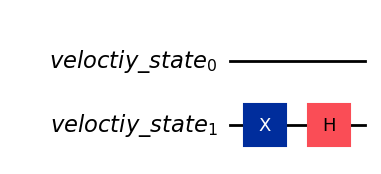

In [41]:
# circuit for y_dot according to q =1 
l = 0 #no of ancillary qubits
q = 1
q_reg1 = QuantumRegister(l, name = "ancillay")
q_reg2 = QuantumRegister(q+1,name = "veloctiy_state")
y_dot_cir = QuantumCircuit(q_reg1,q_reg2)
y_dot_cir.x(l+q)
y_dot_cir.h(l+q)
y_dot_cir.draw()